# NYC Airbnb Data Exploration

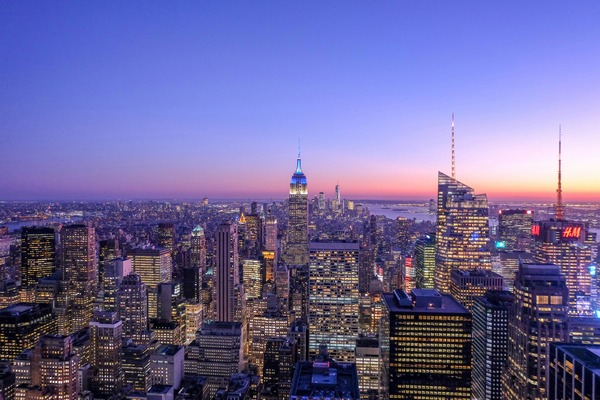

Greetings to New York City (NYC), a globally renowned destination drawing in countless visitors each year. Consequently, there exists a plethora of <a href="https://www.airbnb.com/"><em>Airbnb</em></a> accommodations catering to the substantial demand for short to long-term stays, spanning from a few nights to several months
<p>
Our objectives involve transforming disorganized data into suitable formats for analysis, aiming to address pivotal inquiries such as:</p>
<ul>
<li><i>What is the average nightly price of an Airbnb listing in NYC?</i></li>
<li><i>How does the average monthly price of an Airbnb listing compare to the private rental market? </i></li>
<li><i>What is the count of advertisements for private rooms? </i></li>
<li><i>How do Airbnb listing prices vary across the five boroughs of NYC?</i></li>
</ul>

## 1. Importing Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DateTime as dt

/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_26022/24816170.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Loading Database

In this notebook, we'll explore the NYC Airbnb market by bringing together data from different file types like <code>.csv</code>, <code>.tsv</code>, and <code>.xlsx</code>.</p>

In [3]:
# Load airbnb_price.csv as prices
prices = pd.read_csv("../data/airbnb_price.csv")
prices.info()
prices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [4]:
# Load airbnb_room_type.xlsx as xls
xls = pd.ExcelFile("../data/airbnb_room_type.xlsx")

# Parse the first sheet from xls, room_types
room_types = xls.parse()

room_types.info()
room_types.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [21]:
# Load airbnb_last_review.tsv as reviews
reviews = pd.read_csv("../data/airbnb_last_review.tsv", sep ="\t")

reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   2023listing_id  25209 non-null  int64 
 1   host_name       25201 non-null  object
 2   last_review     25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


,2023listing_id,host_name,last_review
0,2595,Jennifer,May 21 2023
1,3831,LisaRoxanne,July 05 2023
2,5099,Chris,June 22 2023
3,5178,Shunichi,June 24 2023
4,5238,Ben,June 09 2023


## 3. Cleaning Data
<p><b>
3.1. Cleaning Price Column</p></b>
<p>You may have noticed that the <code>price</code> column in the <code>prices</code> DataFrame currently states each value as a string with the currency (dollars) following, i.e.,</p>
<pre><code>price
225 dollars
89 dollars
200 dollars</code></pre>
<p></p>
<p>We will need to remove <code>dollars</code> and transform <code>price</code> to numberic.</p>

In [6]:
# Remove whitespace and string characters from prices column
prices["price"] = prices["price"].str.replace(" dollars","")

# Convert Price column from string to numeric
prices["price"] = pd.to_numeric(prices["price"])

# Overview the Price column by printing descriptive statistics
print(prices["price"].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


<p><b>
3.2. Cleaning Type Room Column</p></b>
<p> First off, we need to look at how many categories that <code>type_room</code> column is including:</p>


In [7]:
room_types["room_type"].unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Privatte room', 'Private rooom',
       'privatte room', 'private rooom', 'Shared room', 'SHARED ROOM'],
      dtype=object)

It can be seen there are two mistakes from the values list of <code>room_type</code> column: wrong spells and inconsistent characters
<p>
First, we need solve this by converting all string characters to lower case: </p>

In [8]:
room_types["room_type"] = room_types["room_type"].str.lower()
room_types["room_type"].unique()

array(['entire home/apt', 'private room', 'shared room', 'privatte room',
       'private rooom'], dtype=object)

Now we solve the wrong-spelled words to correct spell <i>"private room"</i>

In [9]:
# Define a category list for room_type column:
room_type_category = ['entire home/apt', 'private room', 'shared room']
# Import process
from thefuzz import process
# Collapsing all oth the room types
for type in room_type_category:
    # Find the potential matches in types with typoes
    matches = process.extract(type,room_types["room_type"],limit=room_types.shape[0])
    # For each potential_match in matches
    for potential_match in matches:
        # If high similarity score:
        if potential_match [1] >= 80:
            # Replace typo
            room_types.loc[room_types["room_type"] == potential_match[0],"room_type"] = type

# Verify the room_type column's values
room_types["room_type"].unique()

array(['entire home/apt', 'private room', 'shared room'], dtype=object)

<p><b>
3.3. Cleaning Review Column</p></b>


In [22]:
# Change data type of last_review column to datetime
reviews["last_review"] = pd.to_datetime(reviews["last_review"])

# Check today date
import datetime as dt
today_date = dt.date.today()

# Create first_reviewed, the earliest review date
first_reviewed = reviews["last_review"].dt.date.min()

# Create last_reviewed, the most recent review date
last_reviewed = reviews["last_review"].dt.date.max()

# Print the results
print("The latest Airbnb review is {}, the earliest review is {}".format(first_reviewed,last_reviewed))

The latest Airbnb review is 2023-01-01, the earliest review is 2023-07-09


## 4. Joining the dataframes

<p> We'll combine the three DataFrames to streamline future analysis now. After merging the data, we'll eliminate any entries with missing values and ensure there are no duplicates.</p>

In [25]:
# Merge prices and reviews first, assign as rooms_and_prices
rooms_and_prices = pd.merge(room_types, prices, how="outer", on="listing_id")
rooms_and_prices.head()

,listing_id,description,room_type,price,nbhood_full
0,2595,Skylit Midtown Castle,entire home/apt,225,"Manhattan, Midtown"
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,"Brooklyn, Clinton Hill"
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,"Manhattan, Murray Hill"
3,5178,Large Furnished Room Near B'way,private room,79,"Manhattan, Hell's Kitchen"
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,"Manhattan, Chinatown"


<p> Check if there are any missing values

In [26]:
rooms_and_prices.isna().sum()

listing_id      0
description    10
room_type       0
price           0
nbhood_full     0
dtype: int64

<p> We have encountered numerous missing values in the merged dataset due to data cleaning in previous steps. Now, we need to remove these missing values:</p>

In [27]:
rooms_and_prices.dropna(inplace=True)

<p> Check if there are any duplicate values </p>

In [28]:
rooms_and_prices.duplicated().sum()

0

## 5. Analyzing the data
<p><b>
5.1. Airbnb Rental Average Price </p></b>

In [29]:
# Check the rental price distribution
print(rooms_and_prices["price"].describe())

count    25199.000000
mean       141.805945
std        147.370047
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


<p> Although 75% of listings are priced at $175, the presence of a listing priced at $0 is skewing the distribution. To accurately calculate the average price, we need to exclude this free listing</p>

In [30]:
# Subset prices for listings costing $0, free_listings
free_listings = rooms_and_prices["price"]== 0

# Update prices by removing all free listings from prices
rooms_and_prices = rooms_and_prices[~free_listings]

# Calculate the average price, avg_price
avg_price = round(rooms_and_prices["price"].mean(),2)

# Print the average price
print("The average price per night for an Airbnb listing in NYC is ${}.".format(avg_price))

The average price per night for an Airbnb listing in NYC is $141.85.


<p><b>
5.2. Comparing costs to the private rental market </p></b>
<p>
Now that we have the average nightly cost for a listing, it would be beneficial to have a point of reference for comparison. According to <a href="https://www.zumper.com/rent-research">Zumper</a>, the average monthly cost of a 1-bedroom apartment in New York City is $3,100. Let's convert our nightly prices into monthly costs for our listings, enabling us to compare them to the private rental market </p>

In [32]:
# Add a new column to the prices DataFrame, price_per_month
rooms_and_prices["price_per_month"] = rooms_and_prices["price"] * 365 / 12

# Calculate average_price_per_month
average_price_per_month = round(rooms_and_prices["price_per_month"].mean(), 2)

# Compare Airbnb and rental market
print("airbnb monthly costs are ${}, while in the private market you would pay {}.".format(average_price_per_month, "$3,100.00"))

airbnb monthly costs are $4314.46, while in the private market you would pay $3,100.00.


<p><b>
5.3. Analyzing the listing price by boroughs </p></b>

<p>Now that we've consolidated all the data into a single DataFrame, our focus shifts to understanding the disparity in listing prices among the different boroughs of New York City</a>. 
Currently, boroughs are listed as the initial part of a string within the <code>nbhood_full</code> column, for example: </p>
<pre><code>Manhattan, Midtown
Brooklyn, Clinton Hill
Manhattan, Murray Hill
Manhattan, Hell's Kitchen
Manhattan, Chinatown</code></pre>
<p></p>
<p>We will therefore need to extract this information from the string and store in a new column, <code>borough</code>, for analysis.</p>

In [49]:
# Extract information from the nbhood_full column and store as a new column, borough
rooms_and_prices['borough'] = rooms_and_prices['nbhood_full'].str.split(',').str[0]

# Group by borough and calculate summary statistics
boroughs = rooms_and_prices.groupby("borough").agg({"price":["sum", "mean", "median", "count"]}).round(2)

# Print boroughs
print(boroughs)


                 price                      
                   sum    mean median  count
borough                                     
Bronx            55231   79.24   65.0    697
Brooklyn       1275435  122.02   95.0  10453
Manhattan      1898963  184.03  149.0  10319
Queens          320765   92.81   70.0   3456
Staten Island    22974   86.04   71.0    267


<p>The findings indicate that Manhattan leads in average price, surpassing Brooklyn by $60 and nearly doubling the prices of other boroughs. </p>

<p><b>
5.4. Price Range by boroughs </p></b>
<p>The provided output offers a summary of listing prices across the 5 boroughs. For our final task, we aim to categorize listings into specific price ranges and observe this categorization by borough. 
<br><br>
We can do this using percentiles and labels to create a new column, <code>price_range</code>, in the DataFrame.
Once we have created the labels, we can then group the data and count frequencies for listings in each price range by borough.
<br><br>
We will assign the following categories and price ranges:</p>
<table>
<thead>
<tr>
<th>label</th>
<th>price</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Budget</code></td>
<td>\$0-69</td>
</tr>
<tr>
<td><code>Average</code></td>
<td>\$70-175</td>
</tr>
<tr>
<td><code>Expensive</code></td>
<td>\$176-350</td>
</tr>
<tr>
<td><code>Extravagant</code></td>
<td>&gt; \$350</td>
</tr>
</tbody>
</table>

In [51]:
# Create labels for the price range, label_names
label_names = ["Budget", "Average", "Expensive", "Extravagant"]

# Create the label ranges, ranges
ranges = [0, 69, 175, 350, np.inf]

# Insert new column, price_range, into DataFrame
rooms_and_prices["price_range"] = pd.cut(rooms_and_prices["price"], bins=ranges, labels=label_names)


# Calculate borough and price_range frequencies, prices_by_borough
prices_by_borough = rooms_and_prices.groupby(["borough", "price_range"]).agg({"price_range":"count"})
print(prices_by_borough)

                           price_range
borough       price_range             
Bronx         Budget               381
              Average              286
              Expensive             25
              Extravagant            5
Brooklyn      Budget              3194
              Average             5534
              Expensive           1466
              Extravagant          259
Manhattan     Budget              1148
              Average             5288
              Expensive           3073
              Extravagant          810
Queens        Budget              1632
              Average             1505
              Expensive            291
              Extravagant           28
Staten Island Budget               124
              Average              123
              Expensive             20
              Extravagant            0


/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_26022/1910109559.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prices_by_borough = rooms_and_prices.groupby(["borough", "price_range"]).agg({"price_range":"count"})


<p>Here are succinct insights from the data:</p>
<ul>
<li><code>Bronx</code>: Predominantly budget to average prices, with some higher-priced listings.</li>

<li><code>Brooklyn</code>: Diverse range across all price ranges, with a focus on average prices.</li>

<li><code>Manhattan</code>: Primarily higher-priced listings, emphasizing luxury and premium options.</li>

<li><code>Queens</code>: Diverse range, with a notable presence in the average price category. </li>

<li><code>Staten Island</code>: Mainly budget accommodations, indicating affordability as a key factor.</li></ul>

<p><b>
5.5. Analyzing Price by Room Type </p></b>

<p>At first, we need to convert the <code>room_type</code> column to category </p>

In [33]:
# Update the room_type column to category data type
rooms_and_prices["room_type"] = rooms_and_prices["room_type"].astype("category")

<p> 
Understanding the disparity in listing prices among different room types is crucial for identifying market trends and consumer preferences. <p>

In [54]:
# Group by borough and calculate summary statistics
price_by_types = rooms_and_prices.groupby("room_type").agg({"price":["sum", "mean", "median", "count"]}).round(2)

# Print boroughs
print(price_by_types)

                   price                      
                     sum    mean median  count
room_type                                     
entire home/apt  2615613  197.17  159.0  13266
private room      926371   81.68   70.0  11341
shared room        31384   53.65   41.0    585


/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_26022/191307692.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_types = rooms_and_prices.groupby("room_type").agg({"price":["sum", "mean", "median", "count"]}).round(2)


<p>The data illustrates a notable disparity in listing prices among different room types:</p>

<li> <code>Entire Home/Apt</code>: With a total sum of $2,615,613, ,it also boasts the highest count of listings at 13,266. </li>

<li> <code>Private Room</code>: Though the total sum is lower at $926,371, the average price per night is still considerable at $81. Private rooms represent the second-largest category with 11,341 listings.</li>

<li> <code>Shared Room</code>: With an average price per night of $53.65, shared rooms have the fewest listings at 585.</li>